In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from isolation import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)
matplotlib.rc("legend", fontsize=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
filename='/eos/user/a/aperego/Timing/root_files/TTbar/histo_TTbar.root'
file = uproot.open(filename)

In [3]:
file.keys()

['mtdEleIsoNtupler;1',
 'mtdEleIsoNtupler/electrons;1',
 'mtdEleIsoNtupler/tracks;1',
 'mtdEleIsoNtupler/vertices;1']

In [4]:
electrons = file["mtdEleIsoNtupler/electrons"]
tracks = file["mtdEleIsoNtupler/tracks"]
vertices = file["mtdEleIsoNtupler/vertices"]

In [5]:
NEVENTS = 9000

In [6]:
nEle = electrons['nEle'].array()[:NEVENTS]
ele_energy = electrons['ele_energy'].array()[:NEVENTS]
ele_pt = electrons['ele_pt'].array()[:NEVENTS]
ele_eta = electrons['ele_eta'].array()[:NEVENTS]
ele_phi = electrons['ele_phi'].array()[:NEVENTS]
ele_dz = electrons['ele_dz'].array()[:NEVENTS]
ele_dxy = electrons['ele_dxy'].array()[:NEVENTS]
ele_track = electrons['ele_track'].array()[:NEVENTS]
ele_barrel = electrons['ele_barrel'].array()[:NEVENTS]
ele_prompt = electrons['ele_prompt'].array()[:NEVENTS]
ele_time = electrons['ele_time'].array()[:NEVENTS]
ele_timeErr = electrons['ele_timeErr'].array()[:NEVENTS]
ele_mva = electrons['ele_mva'].array()[:NEVENTS]
sum_pT = electrons['sum_pT'].array()[:NEVENTS]
nTracks = electrons['nTracks'].array()[:NEVENTS]

In [7]:
ele_sim_pt = electrons['ele_sim_pt'].array()[:NEVENTS]
ele_sim_time = electrons['ele_sim_time'].array()[:NEVENTS]
track_sim_pt = tracks['track_sim_pt'].array()[:NEVENTS]
track_sim_time = tracks['track_sim_time'].array()[:NEVENTS]

In [8]:
track_pt = tracks['track_pt'].array()[:NEVENTS]
track_dt_ele = tracks['track_dt_ele'].array()[:NEVENTS]
track_dt_vtx = tracks['track_dt_vtx'].array()[:NEVENTS]
track_dz_ele = tracks['track_dz_ele'].array()[:NEVENTS]
track_PVweight = tracks['track_PVweight'].array()[:NEVENTS]
track_time = tracks['track_time'].array()[:NEVENTS]
track_timeErr = tracks['track_timeErr'].array()[:NEVENTS]
track_mva = tracks['track_mva'].array()[:NEVENTS]
track_gen_matched  = tracks['track_gen_matched'].array()[:NEVENTS]

In [9]:
vertex_time = vertices['vertex_time'].array()[:NEVENTS]
vertex_timeErr = vertices['vertex_timeErr'].array()[:NEVENTS]
vertex_nTracks = vertices['vertex_NumberofTracks'].array()[:NEVENTS]
event = vertices['event'].array()[:NEVENTS]

In [10]:
for i in range(10):
    print(f'There are {nEle[i]} in the {i+1}° event of which {len(ele_prompt[i]) - sum(ele_prompt[i])} non prompt')

There are 11 in the 1° event of which 0 non prompt
There are 11 in the 2° event of which 1 non prompt
There are 19 in the 3° event of which 1 non prompt
There are 24 in the 4° event of which 0 non prompt
There are 6 in the 5° event of which 1 non prompt
There are 21 in the 6° event of which 1 non prompt
There are 13 in the 7° event of which 4 non prompt
There are 11 in the 8° event of which 0 non prompt
There are 33 in the 9° event of which 1 non prompt
There are 24 in the 10° event of which 1 non prompt


In [11]:
print(f'Number of events: {len(event)}')

Number of events: 8900


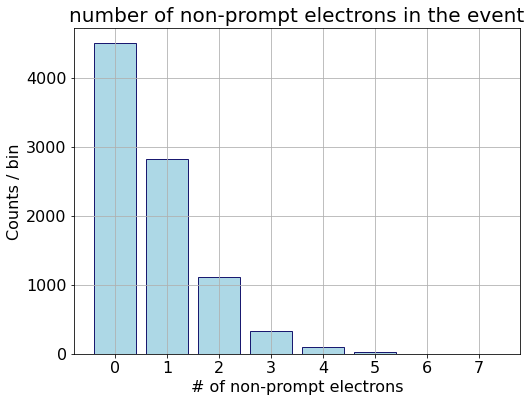

In [12]:
plt.figure(figsize=(8,6))
plt.hist(ak.count(ele_pt, axis=1)-ak.sum(ele_prompt, axis=1), bins=8, range=(-0.5,7.5), color='lightblue', ec="midnightblue", lw=1, rwidth=0.8)
plt.title("number of non-prompt electrons in the event")
plt.xlabel("# of non-prompt electrons")
plt.ylabel("Counts / bin")
plt.grid()
plt.show()

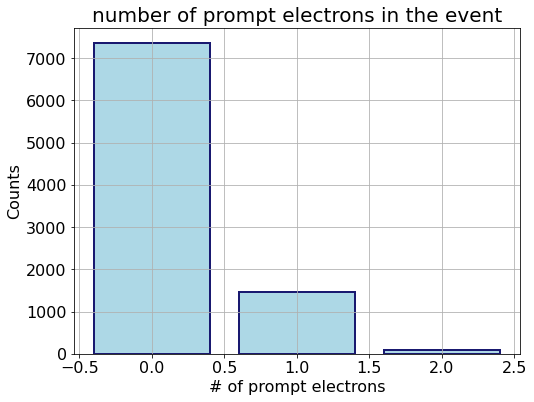

In [13]:
plt.figure(figsize=(8,6))
plt.hist(ak.sum(ele_prompt, axis=1), bins=3, range=(-0.5,2.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title("number of prompt electrons in the event")
plt.xlabel("# of prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

In [14]:
dt_trk_ele = []
dt_trk_vtx = []

for ev in range(len(ele_prompt)):
    for ele in range(len(ele_prompt[ev])):
        if not (ele_prompt[ev][ele]):
            for trk in range(len(track_dt_ele[ev][ele])):
                dt_trk_ele.append(track_dt_ele[ev][ele][trk])
                dt_trk_vtx.append(track_dt_vtx[ev][ele][trk])

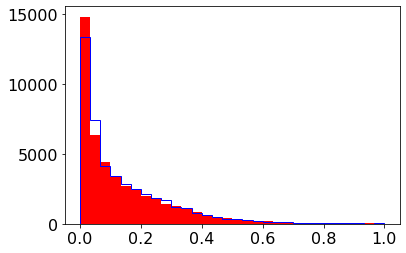

In [15]:
ran=(0,1)
plt.hist(dt_trk_ele, bins=30, color="r",range=ran)
plt.hist(dt_trk_vtx, bins=30, color="b", histtype="step",range=ran)
plt.show()

In [16]:
# hist(ele_pt, title="Electrons pT", xlabel="pT (GeV)", bins = 10)
# hist(ele_eta, title="Electrons eta", xlabel="$\eta$", bins = 10)
# hist(ele_phi, title="Electrons phi", xlabel="$\phi$", bins = 10)

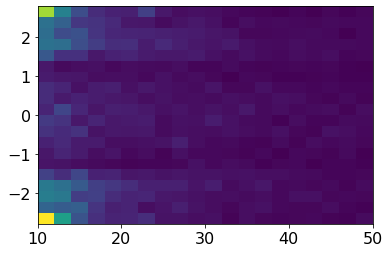

In [17]:
# non prompt (fake) are here as well
plt.hist2d(ak.flatten(ele_pt), ak.flatten(ele_eta), bins=20, range=np.array([[10, 50], [-2.8, 2.8]]))
plt.show()

In [18]:
ele_eta_prompt = []
for ev in range(len(event)):
    for ele_idx in range(len(ele_prompt[ev])):
        if ele_track[ev][ele_idx]==-1:
            continue
      
        if not ele_prompt[ev][ele_idx]:
            continue

        ele_eta_prompt.append(ele_eta[ev][ele_idx])   

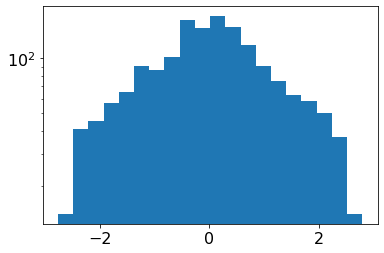

In [19]:
plt.hist(ele_eta_prompt, bins = 20)
plt.yscale("log")
plt.show()

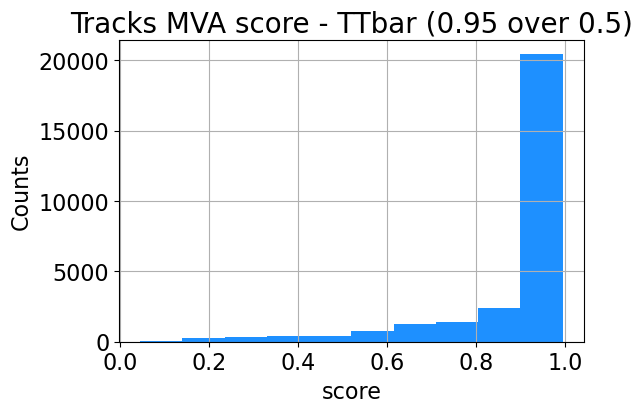

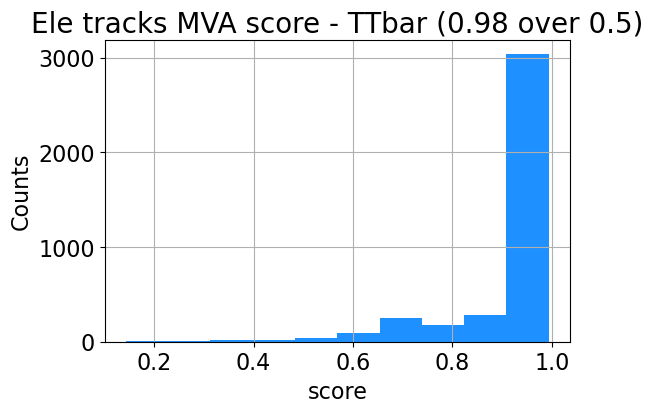

In [20]:
all_tracks_mva = ak.flatten(track_mva[~ele_prompt])[ak.flatten(track_mva[~ele_prompt])>0]
ele_tracks_mva = (ele_mva[~ele_prompt])[(ele_mva[~ele_prompt])>0]
ot = ak.count(all_tracks_mva[all_tracks_mva>0.5])
All = ak.count(all_tracks_mva)
hist(all_tracks_mva, title=f'Tracks MVA score - TTbar ({ot/All:.2f} over 0.5)', xlabel="score", bins = 10)
ot = ak.count(ele_tracks_mva[ele_tracks_mva>0.5])
All = ak.count(ele_tracks_mva)
hist(ele_tracks_mva, title=f'Ele tracks MVA score - TTbar ({ot/All:.2f} over 0.5)', xlabel="score", bins = 10)

## time distributions

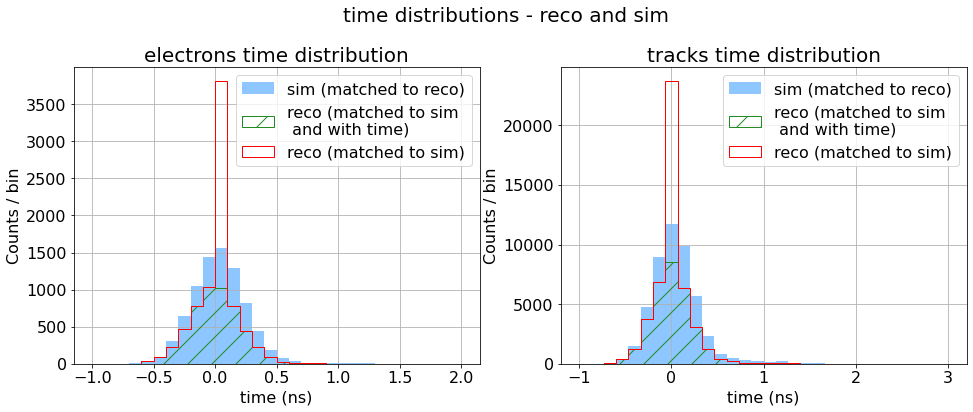

In [21]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - reco and sim", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ak.flatten(ele_sim_time[ele_sim_time!=-1]), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(-1,2))
BB = ak.flatten(ele_time[ele_sim_time!=-1])
plt.hist(BB[BB!=0], bins=30, color='forestgreen', label="reco (matched to sim\n and with time)", histtype="step", range=(-1,2), hatch='/')
plt.hist(BB, bins=30, color='red', label="reco (matched to sim)", histtype="step", range=(-1,2))
plt.title("electrons time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
plt.hist(ak.flatten(ak.flatten(track_sim_time[track_sim_time!=-1])), bins=30, color='dodgerblue', label="sim (matched to reco)", alpha=0.5, range=(-1,3))
AA = ak.flatten(ak.flatten(track_time[track_sim_time!=-1]))
plt.hist(AA[AA != 0], bins=30, color='forestgreen', label="reco (matched to sim\n and with time)", histtype="step", range=(-1,3), hatch='/')
plt.hist(ak.flatten(ak.flatten(track_time[track_sim_time!=-1])), bins=30, color='red', label="reco (matched to sim)", histtype="step", range=(-1,3))
plt.title("tracks time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

### non prompt only

In [22]:
ele_t = []
ele_t_sim = []
track_t = []
track_t_sim = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if ele_prompt[ev][ele] or ele_sim_time[ev][ele]==-1:
            continue
        ele_t.append(ele_time[ev][ele])
        ele_t_sim.append(ele_sim_time[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_sim_time[ev][ele][trk]!=-1:
                track_t.append(track_time[ev][ele][trk])
                track_t_sim.append(track_sim_time[ev][ele][trk])

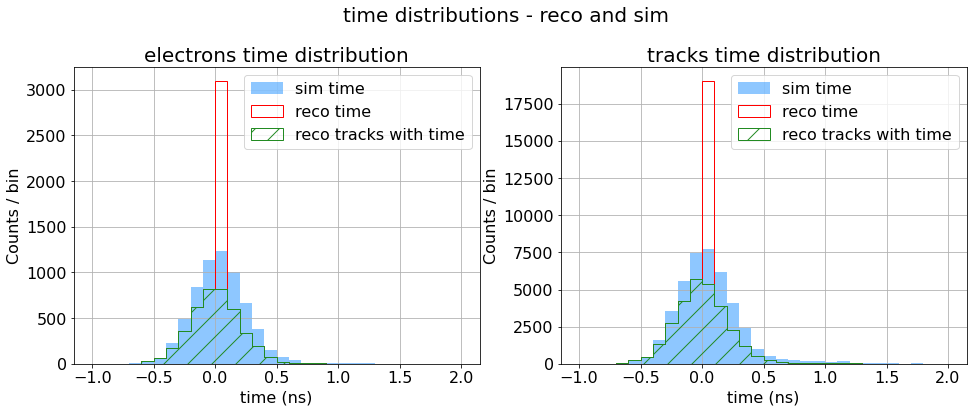

In [23]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - reco and sim", fontsize=20, y=0.95)

plt.subplot(221)
plt.hist(ele_t_sim, bins=30, color='dodgerblue', label="sim time", alpha=0.5, range=(-1,2))
plt.hist(ele_t, bins=30, color='red', label="reco time", histtype="step", range=(-1,2))
ele_t_nozero = np.array(ele_t)
plt.hist(ele_t_nozero[ele_t_nozero!=0], bins=30, color='forestgreen', label="reco tracks with time", histtype="step", range=(-1,2), hatch='/')
plt.title("electrons time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
AA = np.array(track_t_sim)
AA = AA[AA!=-1]
plt.hist(AA, bins=30, color='dodgerblue', label="sim time", alpha=0.5, range=(-1,2))
plt.hist(track_t, bins=30, color='red', label="reco time", histtype="step", range=(-1,2))
track_t_nozero = np.array(track_t)
plt.hist(track_t_nozero[track_t_nozero!=0], bins=30, color='forestgreen', label="reco tracks with time", histtype="step", range=(-1,2), hatch='/')
plt.title("tracks time distribution")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

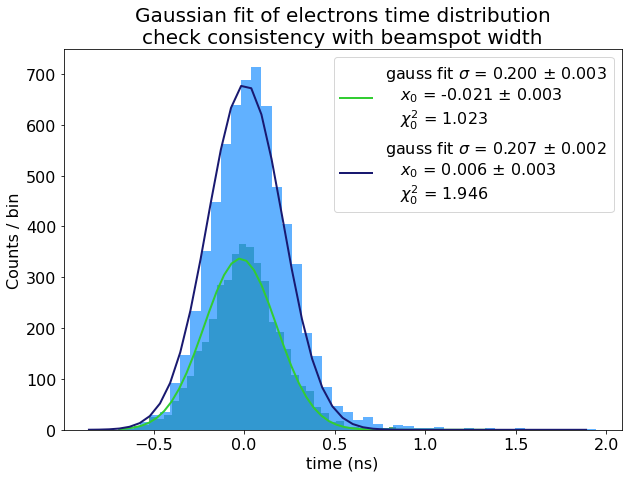

In [24]:
plt.figure(figsize=(10,7))

BINS=50

res, chi2 = gauss_fit_and_plot(ele_t_nozero[ele_t_nozero!=0], init_parms=[600,0,0.1], label="reco", colors=["limegreen","forestgreen"], bins=BINS)
res_sim, chi2_sim = gauss_fit_and_plot(ele_t_sim, init_parms=[1200,0.02,0.1], label="sim", bins=BINS)

plt.title("Gaussian fit of electrons time distribution\ncheck consistency with beamspot width")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.show()

## $(t_R - t_S) / \sigma_t$

In [25]:
ELE_DZ=0.2

In [44]:
ele_delta_t = []
track_delta_t = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if (ele_dz[ev][ele]>0.5 or ele_dxy[ev][ele]>0.2):
            continue
        if ele_prompt[ev][ele]:
            continue
        if ele_sim_time[ev][ele]!=-1 and ele_timeErr[ev][ele]>0:
            ele_delta_t.append((-ele_sim_time[ev][ele]+ele_time[ev][ele])/ele_timeErr[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_mva[ev][ele][trk]<0.5:
                continue
            # cut in dz with ele, tunable
            if (track_dz_ele[ev][ele][trk] > ELE_DZ or track_PVweight[ev][ele][trk] < 0.8):
            #if (track_dz_ele[ev][ele][trk] > ELE_DZ):
                continue
            if track_sim_time[ev][ele][trk]!=-1 and track_timeErr[ev][ele][trk]>0:
                track_delta_t.append((-track_sim_time[ev][ele][trk]+track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])
#                 if (((track_sim_time[ev][ele][trk]-track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])<-10):
#                     print(track_sim_time[ev][ele][trk],track_time[ev][ele][trk],track_timeErr[ev][ele][trk])

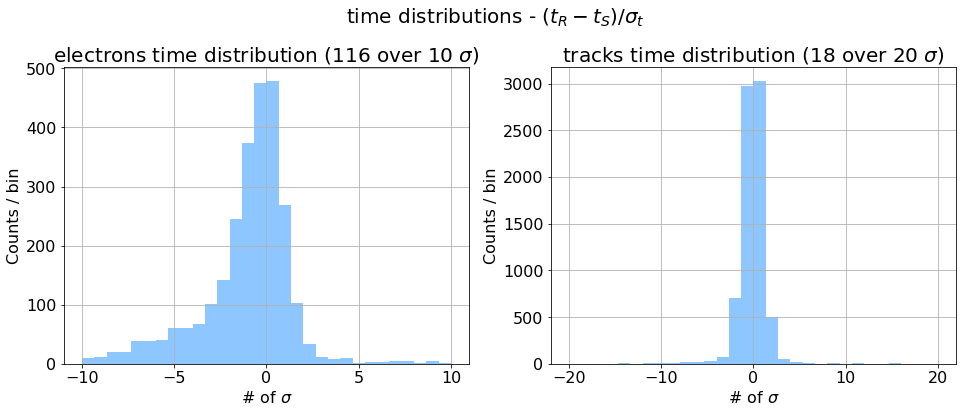

In [45]:
plt.figure(figsize=(16,12))
plt.suptitle("time distributions - $(t_R - t_S) / \sigma_t$", fontsize=20, y=0.95)

nsig=10
plt.subplot(221)
plt.hist(ele_delta_t, bins=30, color='dodgerblue', alpha=0.5, range=(-nsig,nsig))
AA = np.array(ele_delta_t)
ot = len(AA[AA>nsig])+len(AA[AA<-nsig])
plt.title(f'electrons time distribution ({ot} over {nsig} $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.grid() 

nsig=20
plt.subplot(222)
plt.hist(track_delta_t, bins=30, color='dodgerblue', alpha=0.5, range=(-nsig,nsig))
AA = np.array(track_delta_t)
ot = len(AA[AA>nsig])+len(AA[AA<-nsig])
plt.title(f'tracks time distribution ({ot} over {nsig} $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.grid() 

plt.show()

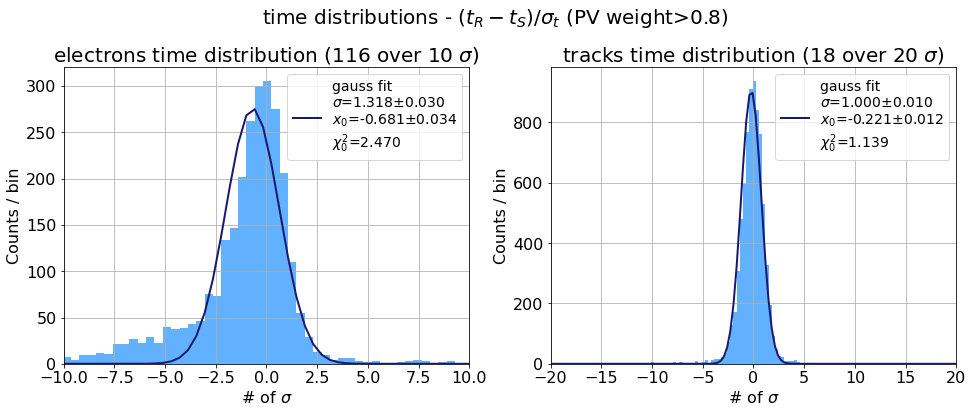

In [47]:
BINS=200

plt.figure(figsize=(16,12))
plt.suptitle("time distributions - $(t_R - t_S) / \sigma_t$", fontsize=20, y=0.95)

plt.subplot(221)
res, chi2 = gauss_fit_and_plot(ele_delta_t, init_parms=[300,0,1], label="ele", bins=BINS)
AA = np.array(ele_delta_t)
ot = len(AA[AA>10])+len(AA[AA<-10])
plt.title(f'electrons time distribution ({ot} over 10 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.xlim(-10,10)
# plt.legend()
# plt.grid() 

plt.subplot(222)
res_sim, chi2_sim = gauss_fit_and_plot(track_delta_t, init_parms=[700,0,1], label="tracks", bins=BINS)
AA = np.array(track_delta_t)
ot = len(AA[AA>20])+len(AA[AA<-20])
plt.title(f'tracks time distribution ({ot} over 20 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
# plt.legend()
plt.xlim(-20,20)
# plt.grid() 

plt.show()

## dt distributions

In [30]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                                                                     track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ELE_DZ=0.2, SIGNAL=False)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], ele_time[~ele_barrel], ele_timeErr[~ele_barrel], 
                                                                     track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=False)

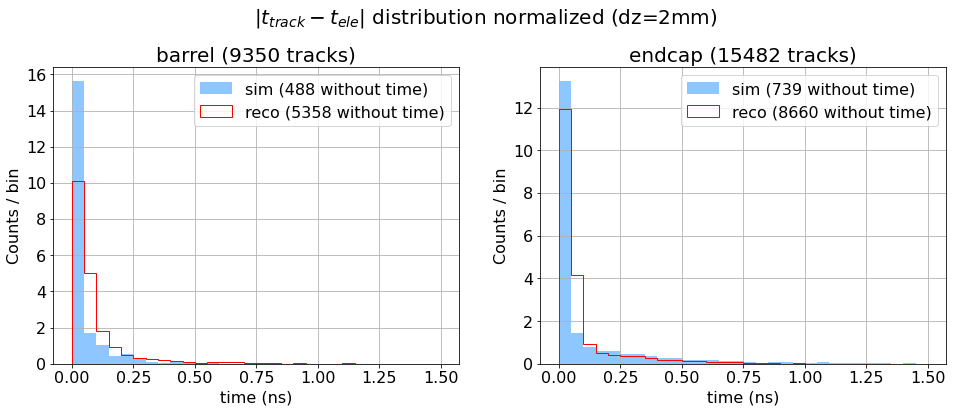

In [31]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{ele}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
#plt.hist(ele_reco_dt_matched_B, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
#plt.hist(np.zeros(noreco_E), bins=bins, range=ran, color="green", histtype="step")
#plt.hist(ele_reco_dt_matched_E, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

## track time efficiency

In [32]:
time_ele_B, all_ele_B, time_track_B, all_track_B = track_efficiency(ele_prompt, ele_track, ele_sim_pt, ele_dz, ele_dxy, ele_barrel, ele_time, ele_timeErr, 
                                                                    track_sim_pt, track_dz_ele, track_time, track_timeErr, SIGNAL=False)
time_ele_E, all_ele_E, time_track_E, all_track_E = track_efficiency(ele_prompt, ele_track, ele_sim_pt, ele_dz, ele_dxy, ele_barrel, ele_time, ele_timeErr, 
                                                                    track_sim_pt, track_dz_ele, track_time, track_timeErr,
                                                                    BARREL=False, SIGNAL=False)

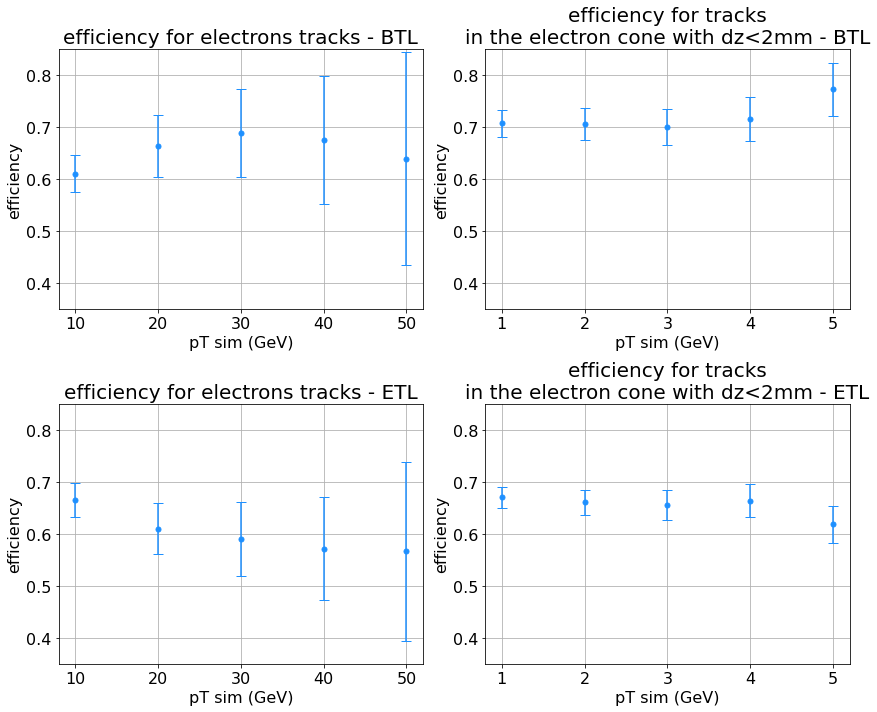

In [33]:
fig = plt.figure(figsize=(12,10))
# plt.suptitle("efficiency of time assignment to tracks", fontsize=20, y=0.97)

bins=np.array([10,20,30,40,50,60])
track_eff_plot(bins, all_ele_E, time_ele_E, title="efficiency for electrons tracks - ETL", pos=223)
plt.ylim(0.35,0.85)
plt.grid()

bins=np.array([1,2,3,4,5,6])
track_eff_plot(bins, all_track_E, time_track_E, title="efficiency for tracks\nin the electron cone with dz<2mm - ETL", pos=224)
plt.ylim(0.35,0.85)
plt.grid()

bins=np.array([10,20,30,40,50,60])
track_eff_plot(bins, all_ele_B, time_ele_B, title="efficiency for electrons tracks - BTL", pos=221)
plt.ylim(0.35,0.85)
plt.grid()

bins=np.array([1,2,3,4,5,6])
track_eff_plot(bins, all_track_B, time_track_B, title="efficiency for tracks\nin the electron cone with dz<2mm - BTL", pos=222)

plt.ylim(0.35,0.85)
plt.grid()

fig.tight_layout()
plt.show()

## dt distribution with the vertex

In [36]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = vertex_dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], 
                                                                    track_timeErr[ele_barrel], ELE_DZ=0.2, SIGNAL=False)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = vertex_dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], 
                                                                    track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=False)

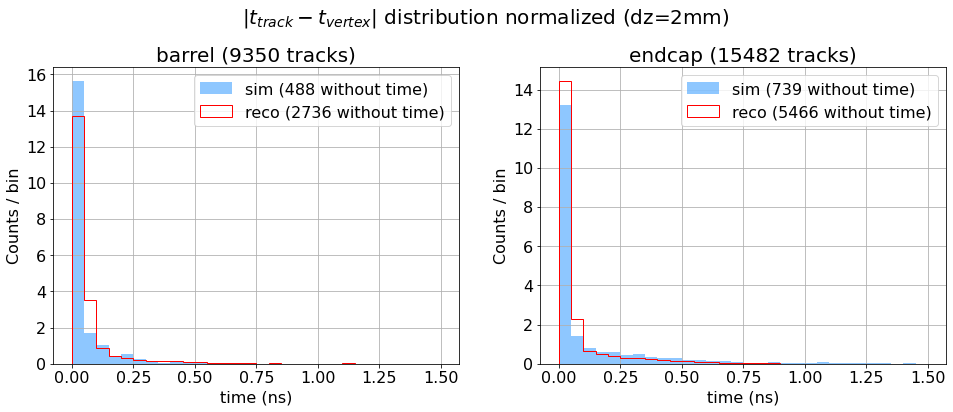

In [37]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{vertex}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()